In [2]:
%load_ext autoreload
%autoreload 2

import os
from itertools import count

import contextily as cx
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import geopandas
import osmnx as ox
import pandas as pd
# from tqdm.auto import tqdm
from libpysal.cg import voronoi_frames

import shapely
shapely.speedups.disable()

DATA = "data"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
G = nx.read_gpickle(os.path.join(DATA, "shortest_paths.gpickle"))

In [41]:
edges = G.edges()
nodes = G.nodes()
print(f"Liczba krawędzi {len(edges)}")
print(f"Liczba wierzchołków {len(nodes)}")
print(f"Liczba komponentów: {nx.number_connected_components(G)}")

Liczba krawędzi 116896
Liczba wierzchołków 86564
Liczba komponentów: 1


In [9]:
degrees = []
for node in nodes:
    degree = G.degree(node)
    degrees.append(degree)

<BarContainer object of 24 artists>

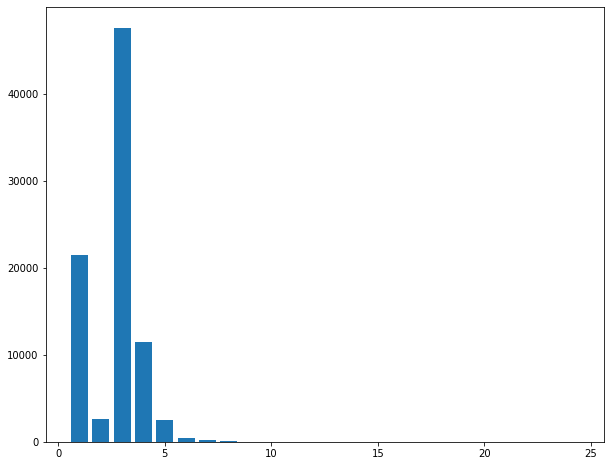

In [10]:
plt.figure(figsize=[10,8])
from collections import Counter

degree_counts = Counter(degrees)
min_degree, max_degree = min(degree_counts.keys()), max(degree_counts.keys())

plot_x = list(range(min_degree, max_degree + 1))
plot_y = [degree_counts.get(x, 0) for x in plot_x]

plt.bar(plot_x, plot_y)

In [13]:
diameter = nx.diameter(G)
print(f"Średnica grafu wynosi: {diameter}")

Średnica grafu wynosi: 165


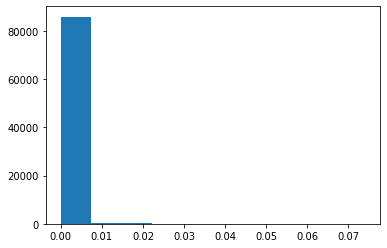

Highest betweeness node is 1403682198


In [39]:
G2 = nx.DiGraph(G)

betweenness = nx.centrality.betweenness_centrality(G2)
highest_betweenness_node = max(G2.nodes, key=betweenness.get)
plt.hist(betweenness.values())
plt.show()


print(f"Highest betweeness node is {highest_betweenness_node}")

In [35]:
eccentricity  = nx.algorithms.distance_measures.eccentricity(G)
highest_eccentricity_node  = max(G.nodes, key=eccentricity.get)
highest_eccentricity_node 



1098288328

In [18]:
G_nodes, G_streets = ox.graph_to_gdfs(G)

G_nodes = G_nodes.to_crs(epsg=2177)
G_streets = G_streets.to_crs(epsg=2177)

## Tylko ścieki rowerowe, ktore istnieja (czerwone)

In [23]:
# G_bike_paths = G_streets[G_streets['type'] == 'bike_path'] # czerwony
G_bike_paths = nx.Graph(((u, v, e) for u,v,e in G.edges(data=True) if e['type'] == 'bike_path'))
G_bike_paths

In [26]:
edges = G_bike_paths.edges()
print(f"Liczba krawędzi {len(edges)}")
nodes = G_bike_paths.nodes()
print(f"Liczba wierzchołków {len(nodes)}")
print(f"Liczba komponentów: {nx.number_connected_components(G_bike_paths)}")

Liczba krawędzi 7953
Liczba wierzchołków 6849
Liczba komponentów: 193


<BarContainer object of 7 artists>

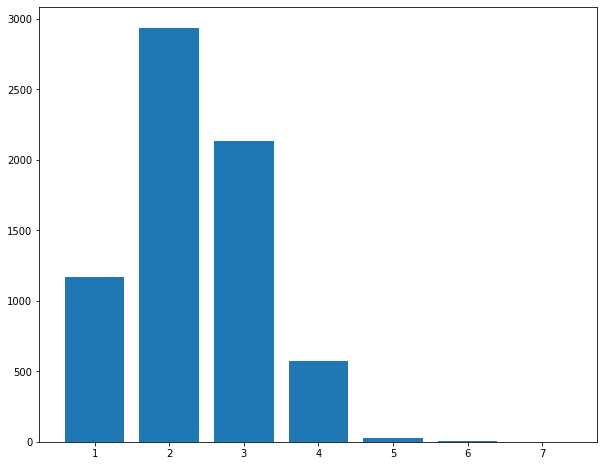

In [30]:
degrees_bike_paths = []
for node in nodes:
    degree = G_bike_paths.degree(node)
    degrees_bike_paths.append(degree)

plt.figure(figsize=[10,8])
from collections import Counter

degree_counts = Counter(degrees_bike_paths)
min_degree, max_degree = min(degree_counts.keys()), max(degree_counts.keys())

plot_x = list(range(min_degree, max_degree + 1))
plot_y = [degree_counts.get(x, 0) for x in plot_x]

plt.bar(plot_x, plot_y)

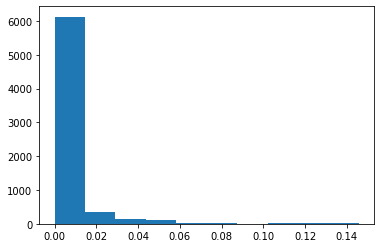

Highest betweeness node is 1003418


In [33]:
betweenness_bike_paths = nx.centrality.betweenness_centrality(G_bike_paths)
highest_betweenness_node_bike_paths = max(G_bike_paths.nodes, key=betweenness_bike_paths.get)
plt.hist(betweenness_bike_paths.values())
plt.show()

print(f"Highest betweeness node is {highest_betweenness_node_bike_paths}")

In [36]:
Gcc = sorted(nx.connected_components(G_bike_paths), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])

eccentricity_bike_paths  = nx.algorithms.distance_measures.eccentricity(G0)
highest_eccentricity_node_bike_paths  = max(G0.nodes, key=eccentricity_bike_paths.get)
highest_eccentricity_node_bike_paths 

1000134

## Tylko nowo dodane sciezki

In [43]:
# G_bike = G_streets[G_streets.get('additional') == 'new_bike_path'] # niebieski
# G_new_bike_paths = nx.Graph(((u, v, e) for u,v,e in G.edges(data=True) if e['additional'] == 'new_bike_path'))
G_new_bike_paths = nx.Graph(((u, v, e) for u,v,e in G.edges(data=True) if e.get('additional') == 'new_bike_path'))
G_new_bike_paths

In [44]:
edges_new_bike_paths = G_new_bike_paths.edges()
print(f"Liczba krawędzi {len(edges_new_bike_paths)}")
nodes_new_bike_paths = G_new_bike_paths.nodes()
print(f"Liczba wierzchołków {len(nodes_new_bike_paths)}")
print(f"Liczba komponentów: {nx.number_connected_components(G_new_bike_paths)}")

Liczba krawędzi 9692
Liczba wierzchołków 10221
Liczba komponentów: 529


<BarContainer object of 8 artists>

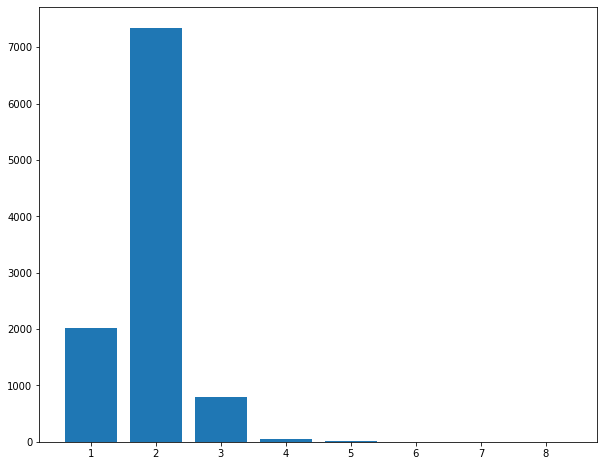

In [45]:
degrees_new_bike_paths = []
for node in nodes_new_bike_paths:
    degree = G_new_bike_paths.degree(node)
    degrees_new_bike_paths.append(degree)

plt.figure(figsize=[10,8])
from collections import Counter

degree_counts = Counter(degrees_new_bike_paths)
min_degree, max_degree = min(degree_counts.keys()), max(degree_counts.keys())

plot_x = list(range(min_degree, max_degree + 1))
plot_y = [degree_counts.get(x, 0) for x in plot_x]

plt.bar(plot_x, plot_y)

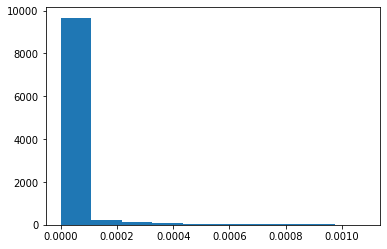

Highest betweeness node is 312802923


In [47]:
betweenness_new_bike_paths = nx.centrality.betweenness_centrality(G_new_bike_paths)
highest_betweenness_node_new_bike_paths = max(G_new_bike_paths.nodes, key=betweenness_new_bike_paths.get)
plt.hist(betweenness_new_bike_paths.values())
plt.show()

print(f"Highest betweeness node is {highest_betweenness_node_new_bike_paths}")

In [ ]:
Gcc = sorted(nx.connected_components(G_new_bike_paths), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])

eccentricity_new_bike_paths = nx.algorithms.distance_measures.eccentricity(G0)
highest_eccentricity_node_new_bike_paths  = max(G0.nodes, key=eccentricity_new_bike_paths.get)
highest_eccentricity_node_new_bike_paths

## Nowe plus istniejące ściezki rowerowe

In [51]:
G_bike_all_paths = nx.Graph(((u, v, e) for u,v,e in G.edges(data=True) if e['type'] == 'bike_path' or e.get('additional') == 'new_bike_path'))
G_bike_all_paths

In [52]:
edges_bike_all_paths = G_bike_all_paths.edges()
print(f"Liczba krawędzi {len(edges_bike_all_paths)}")
nodes_bike_all_paths = G_bike_all_paths.nodes()
print(f"Liczba wierzchołków {len(nodes_bike_all_paths)}")
print(f"Liczba komponentów: {nx.number_connected_components(G_bike_all_paths)}")

Liczba krawędzi 17645
Liczba wierzchołków 16541
Liczba komponentów: 193


<BarContainer object of 8 artists>

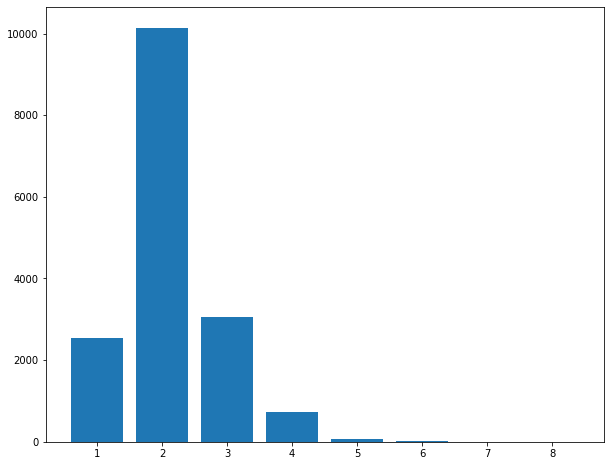

In [53]:
degrees_bike_all_paths = []
for node in nodes_bike_all_paths:
    degree = G_bike_all_paths.degree(node)
    degrees_bike_all_paths.append(degree)

plt.figure(figsize=[10,8])
from collections import Counter

degree_counts = Counter(degrees_bike_all_paths)
min_degree, max_degree = min(degree_counts.keys()), max(degree_counts.keys())

plot_x = list(range(min_degree, max_degree + 1))
plot_y = [degree_counts.get(x, 0) for x in plot_x]

plt.bar(plot_x, plot_y)

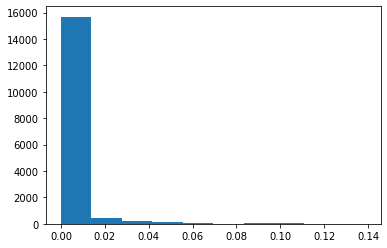

Highest betweeness node is 1003418


In [73]:
betweenness_bike_all_paths = nx.centrality.betweenness_centrality(G_bike_all_paths)
highest_betweenness_bike_all_paths = max(G_bike_all_paths.nodes, key=betweenness_bike_all_paths.get)
plt.hist(betweenness_bike_all_paths.values())
plt.show()

print(f"Highest betweeness node is {highest_betweenness_bike_all_paths}")

In [74]:
np.mean(list(betweenness_bike_all_paths.values()))

0.003031293652790353

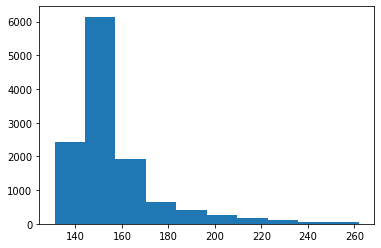

'1372_building'

In [55]:
Gcc = sorted(nx.connected_components(G_bike_all_paths), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])

eccentricity_bike_all_paths = nx.algorithms.distance_measures.eccentricity(G0)
plt.hist(eccentricity_bike_all_paths.values())
plt.show()

highest_eccentricity_bike_all_paths  = max(G0.nodes, key=eccentricity_bike_all_paths.get)
highest_eccentricity_bike_all_paths

In [60]:
np.mean(list(eccentricity_bike_all_paths.values()))

156.80419809773696

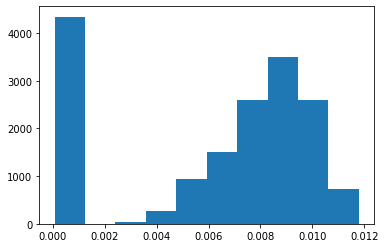

1004923

In [64]:
closeness_centrality_bike_all_paths = nx.closeness_centrality(G_bike_all_paths)
plt.hist(closeness_centrality_bike_all_paths.values())
plt.show()

highest_closeness_centrality_bike_all_paths  = max(G_bike_all_paths.nodes, key=closeness_centrality_bike_all_paths.get)
highest_closeness_centrality_bike_all_paths

In [65]:
np.mean(list(closeness_centrality_bike_all_paths.values()))

0.006260080162644579

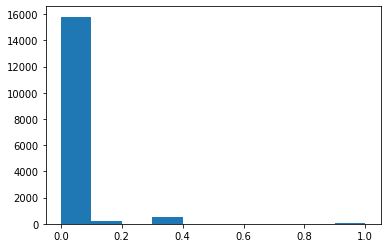

1000367

In [71]:
G2 = nx.DiGraph(G_bike_all_paths)

clustering = nx.clustering(G2)

plt.hist(clustering.values())
plt.show()


highest_clustering_bike_all_paths  = max(G2.nodes, key=clustering.get)
highest_clustering_bike_all_paths

In [72]:
np.mean(list(clustering.values()))

0.013566433767751705